## **Polynomial Model**

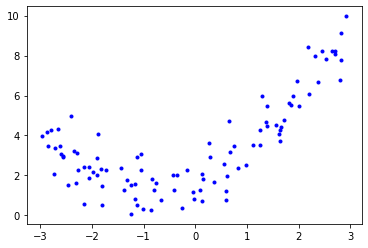

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X,y,'b.')

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([1.78134581]), array([[0.93366893, 0.56456263]]))

## **Learning Curves**
Son gráficos del
rendimiento del modelo en el conjunto de entrenamiento y en el conjunto de
validación en función del tamaño del conjunto de entrenamiento (o de la
iteración de entrenamiento). Para generar los gráficos, entrene el modelo
varias veces con subconjuntos de diferentes tamaños del conjunto de
entrenamiento. por ejemplo: 


In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-*", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

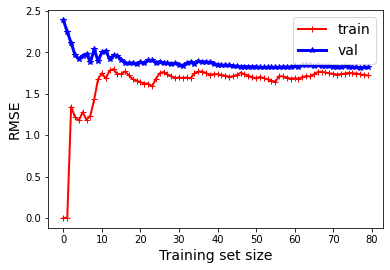

In [20]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.show()      

Este modelo no se ajusta bien(**Underfiting**), resulta imposible que el
modelo se ajuste perfectamente a los datos de entrenamiento, tanto porque los
datos tienen ruido como porque no son lineales en absoluto. Por lo tanto, el
error en los datos de entrenamiento aumenta hasta que alcanza una meseta,
momento en el que añadir nuevas instancias al conjunto de entrenamiento no
mejora ni empeora mucho el error medio. Veamos ahora el rendimiento del
modelo en los datos de validación, a medida que el modelo recibe más ejemplos de 
entrenamiento, aprende y, por tanto, el error de validación disminuye lentamente.
Sin embargo, una vez más,una línea recta no puede modelizar bien los datos, por lo
 que el error acaba en
una meseta, muy cerca de la otra curva.
> Curvas asi son tipicas de Overfitting models

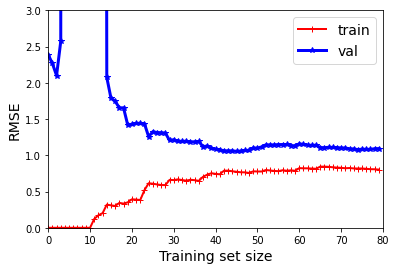

In [26]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10,
                                         include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()


Diferencias muy importantes con las curva anterior:
* El error en los datos de entrenamiento es mucho menor que con el
modelo de regresión lineal.
* Hay un hueco entre las curvas. Esto significa que el modelo funciona
mucho mejor con los datos de entrenamiento que con los datos de
validación, lo que es el sello distintivo de un modelo sobreajustado(**Overfitting**).
 
 Sin embargo, si se utilizara un conjunto de entrenamiento mucho
mayor, las dos curvas seguirían acercándose